The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This project will attempt to predict the species of plant based on its characteristics using a grid search on a SVM model.

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


Shows what type of information the file contains.

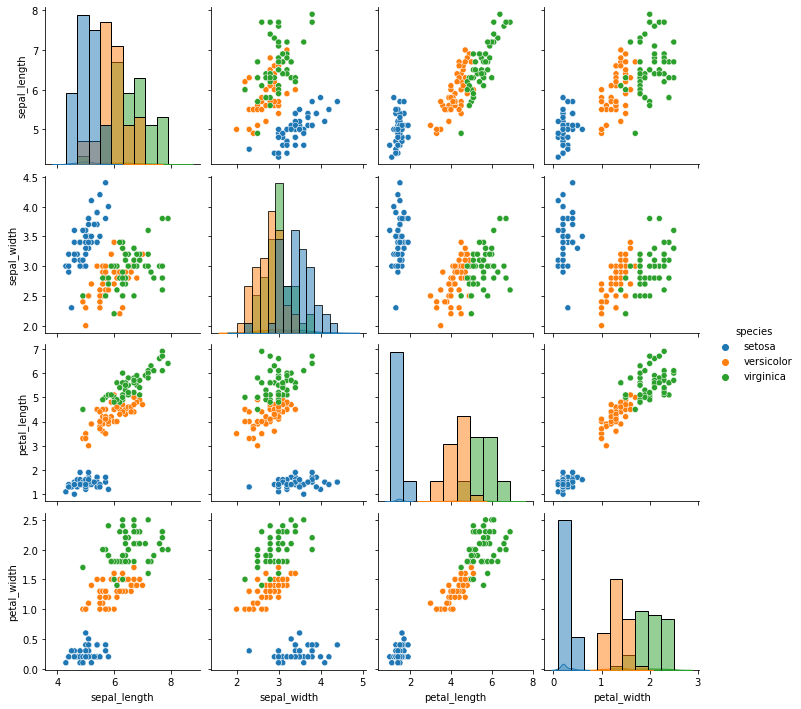

In [7]:
iris2 = sns.load_dataset('iris')         
g=sns.pairplot(data=iris2,hue='species')
g.map_diag(sns.histplot)
plt.show()

The pairplotshows that the setosa species' characteristics are much different than both, the versicolor and virginica species,
however, the setosa and versicolor species has some overlapping characteristics.

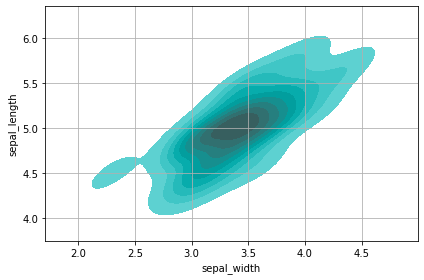

In [11]:
bySpecies = iris2[iris2['species']=="setosa"]
sns.kdeplot(data=bySpecies,x='sepal_width',y='sepal_length',kind='kde',color="#99ffff",shade=True,shade_lowest=False)
plt.grid()
plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings('ignore')

The kdeplot shows the sepal length and width of the setosa species.

In [14]:
X=iris2.drop('species',axis=1)
y=iris2['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

param_grid = {"C":[0.1,1,10,100,1000],"gamma":[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.0s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.0s
[CV 2/5] END ..............................C=0.

[CV 2/5] END ...........................C=1000, gamma=0.0001; total time=   0.0s
[CV 3/5] END ...........................C=1000, gamma=0.0001; total time=   0.0s
[CV 4/5] END ...........................C=1000, gamma=0.0001; total time=   0.0s
[CV 5/5] END ...........................C=1000, gamma=0.0001; total time=   0.0s
{'C': 1, 'gamma': 0.1}
SVC(C=1, gamma=0.1)
0.9619047619047618


In [15]:
grid.prediction = grid.predict(X_test)
print(confusion_matrix(y_test,grid.prediction))
print(classification_report(y_test,grid.prediction))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [ ]:
The model was able to accurately predict the species of plant based off of physical characteristics.